In [1]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# load model
model = load_model("final_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [29]:
i=0
GR_dict={0:(0,255,0),1:(0,0,255)}

model = tf.keras.models.load_model('final_model.h5')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

output=[]
cap = cv2.VideoCapture(0)

while (i<=100):
    ret, img = cap.read()
    #gray = cv2.cvtColor(img,cv2.COLOR_B
    # GR2GRAY)
    faces = face_cascade.detectMultiScale(img,1.05,5)

    for x,y,w,h in faces:

        face_img = img[y:y+h,x:x+w] 

        resized = cv2.resize(face_img,(224,224))
        reshaped=resized.reshape(1, 224,224,3)/255
        predictions = model.predict(reshaped)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'surprise')
        predicted_emotion = emotions[max_index]
        output.append(predicted_emotion)
            
            
            
        cv2.rectangle(img,(x,y),(x+w,y+h),GR_dict[1],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),GR_dict[1],-1)
        cv2.putText(img, predicted_emotion, (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    i = i+1

    cv2.imshow('LIVE', img)
    key = cv2.waitKey(1)
    if key == 27: 
        cap.release()
        cv2.destroyAllWindows()
        break
print(output)
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 29ms/step
['sad', 'neutral', 'sad', 'sad', 'sad', 'sad', 'sad', 'neutral', 'neutral', 'sad', 'sad', 'neutral', 'neutral', 'sad', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'neutral', 'neutral', 'neutral', 'neutral', 'fear', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'sad', 'neutral', 'neutral', 'neutral'

In [30]:
import statistics as st
final_output = st.mode(output)
final_output

'neutral'

In [18]:
import collections

# Get the mode of the predictions
mode = collections.Counter(output).most_common(1)[0][0]

# Calculate the accuracy of the model
accuracy = output.count(mode) / len(output)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.970873786407767


In [31]:
import collections

# Get the mode of the predictions
mode = collections.Counter(output).most_common(1)[0][0]

# Calculate the accuracy of the model
accuracy = output.count(mode) / len(output)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8235294117647058


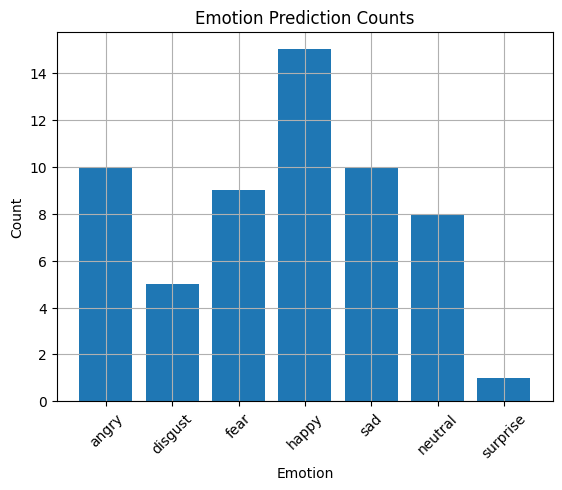

In [5]:
import numpy as np
import matplotlib.pyplot as plt

emotions = np.array(["angry", "disgust", "fear", "happy", "sad", "neutral", "surprise"])
emotion_counts = np.array([10, 5, 9, 15, 10, 8, 1])

plt.bar(emotions, emotion_counts)
plt.title("Emotion Prediction Counts")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(emotions, rotation=45)
plt.grid(True)
plt.show()

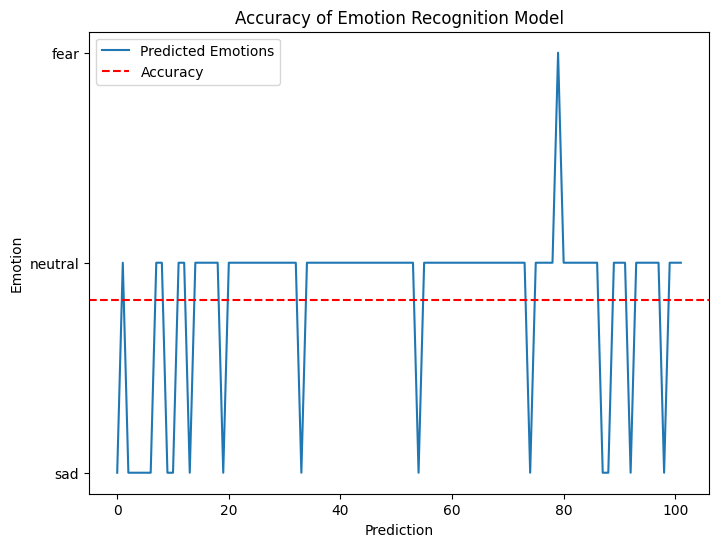

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import collections
# Get the mode of the predictions
mode = collections.Counter(output).most_common(1)[0][0]
# Calculate the accuracy of the model
accuracy = output.count(mode) / len(output)
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(output, label='Predicted Emotions')
plt.axhline(y=accuracy, color='red', linestyle='--', label='Accuracy')
plt.xlabel('Prediction')
plt.ylabel('Emotion')
plt.title('Accuracy of Emotion Recognition Model')
plt.legend()
plt.show()